Aqui montaremos a rede para avaliar os dados para a tarefa de classificação multiclasse com a utilização dos dados brutos

## Integrantes

- Elisa Yea Ji Lee - NUSP 11892473
- João Victor Andrade Lúcio - NUSP 11207877
- Leonardo Zoppello Fernandes - NUSP 13838749
- Marcos Paulo Tomás Ferreira - NUSP 13747950
- Rafael Moura de Almeida - NUSP 11225505
- Thomas Delfs - NUSP 13837175

Importar as bibliotecas e os dados do conjunto MNIST

In [8]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Carregar os dados
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalizar e redimensionar os dados

In [9]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

Converter os rótulos para one-hot encoding

`to_categorical(rótulos, número de classes)`

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Construir o modelo

In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

Compilar o modelo

In [12]:
# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- Criando e salvando os hiperparâmetros da arquitetura e da inicialização em formato json em arquivos-brutos/hiperparametros.json

- Salvando os pesos iniciais

In [13]:
# HIPERPARÂMETROS
hiperparametros = {
    "arquitetura": {
        "camadas": [
            {"tipo": "Conv2D", "filtros": 32, "kernel_size": 3, "ativacao": "relu"},
            {"tipo": "MaxPooling2D", "pool_size": 2},
            {"tipo": "Conv2D", "filtros": 64, "kernel_size": 3, "ativacao": "relu"},
            {"tipo": "MaxPooling2D", "pool_size": 2},
            {"tipo": "Flatten"},
            {"tipo": "Dense", "unidades": 64, "ativacao": "relu"},
            {"tipo": "Dense", "unidades": 10, "ativacao": "softmax"}
        ]
    },
    "inicializacao": {
        "optimizer": "adam",
        "loss": "categorical_crossentropy",
        "metrics": ["accuracy"]
    }
}

# Serializando os hiperparâmetros em uma string JSON
hiperparametros_json = json.dumps(hiperparametros, indent=4)

# Escrevendo a string JSON em um arquivo
with open("arquivos-brutos/hiperparametros.json", "w") as arquivo:
    arquivo.write(hiperparametros_json)


# PESOS INICIAIS
model.save_weights('arquivos-brutos/pesos_iniciais.weights.h5')

Treinar o modelo

In [14]:
historico = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.8340 - loss: 0.5020 - val_accuracy: 0.9833 - val_loss: 0.0537
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9763 - loss: 0.0789 - val_accuracy: 0.9871 - val_loss: 0.0445
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.9810 - loss: 0.0594 - val_accuracy: 0.9885 - val_loss: 0.0390
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9902 - val_loss: 0.0360
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9861 - loss: 0.0438 - val_accuracy: 0.9892 - val_loss: 0.0402
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9888 - loss: 0.0359 - val_accuracy: 0.9889 - val_loss: 0.0379
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9898 - val_loss: 0.0343
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9906 -

- Salvando os pesos finais da rede 
- Salvando o histórico de perda para cada iteração
- Salvando as saídas produzidas pela rede para cada um dos dados de teste

In [15]:
# PESOS FINAIS
model.save_weights('arquivos-brutos/pesos_finais.weights.h5')

# ERRO DE CADA ITERAÇÃO
perdas = historico.history['loss']

# Salvando o histórico de perda em um arquivo JSON
with open('arquivos-brutos/historico_perda.json', 'w') as f:
    json.dump(perdas, f)


# SAÍDAS PRODUZIDAS
# Fazendo inferência com o modelo treinado para obter as saídas
saidas = model.predict(x_test)

# Convertendo as saídas para uma lista para serialização
saidas_lista = saidas.tolist()

# Salvando as saídas em um arquivo JSON
with open('arquivos-brutos/saidas_teste.json', 'w') as f:
    json.dump(saidas_lista, f)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


Calculando a matriz de confusão

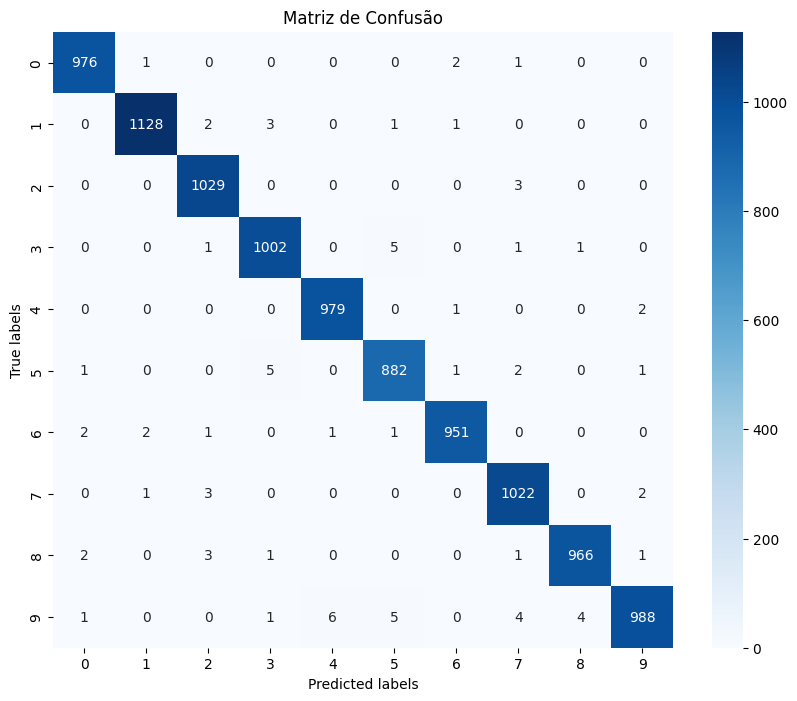

In [16]:
# Previsões
classes_previstas = np.argmax(saidas, axis=1)
classes_verdadeiras = np.argmax(y_test, axis=1)

# Calcule a matriz de confusão
cm = confusion_matrix(classes_verdadeiras, classes_previstas)

# Plot a matriz de confusão
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusão')
plt.show()

Testar o modelo

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9904 - loss: 0.0313
Test accuracy: 0.9922999739646912


NOTAS:

Para criar um modelo de CNN (Rede Neural Convolucional) para o conjunto de dados MNIST, que é um conjunto de dígitos manuscritos de 0 a 9, e portanto um problema de classificação multiclasse, seguiremos os seguintes passos em pseudocódigo:

Importar as bibliotecas necessárias.
Carregar o conjunto de dados MNIST.
Pré-processar os dados:
Normalizar os valores dos pixels para o intervalo de 0 a 1.
Redimensionar as imagens, se necessário, para garantir que todas tenham o mesmo tamanho.
Converter os rótulos (labels) para uma representação "one-hot" para a classificação multiclasse.
Construir o modelo da CNN:
Adicionar camadas convolucionais para extrair características das imagens.
Utilizar camadas de pooling para reduzir a dimensionalidade.
Adicionar camadas de dropout para reduzir o overfitting.
Incluir uma camada achatada (Flatten) para transformar os mapas de características em um vetor.
Adicionar uma ou mais camadas densas (fully connected) para a classificação.
A última camada densa deve ter um número de neurônios igual ao número de classes (10 para MNIST) e utilizar a função de ativação softmax para a classificação multiclasse.
Compilar o modelo:
Escolher um otimizador (por exemplo, Adam).
Definir a função de perda (loss function) como 'categorical_crossentropy' para classificação multiclasse.
Especificar métricas para monitorar, como 'accuracy'.
Treinar o modelo com os dados de treinamento.
Avaliar o modelo com os dados de teste para verificar a precisão.
Agora, vamos transformar esse pseudocódigo em código Python usando TensorFlow e Keras: